In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("/Users/saipranaychitneni/Documents/LetsUpgrade/Assignments/Day27 KNN SVM /titanic//train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data['Age'].fillna(data['Age'].mean(),inplace = True)


In [6]:
data['Embarked'].fillna(value = 'S', inplace= True)

In [7]:
data['Fare']= np.round(data['Fare'])

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
data.drop(['Cabin','PassengerId','Name','Ticket'], axis=1, inplace = True)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.0,S
1,1,1,female,38.0,1,0,71.0,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc478a8dc10>,
      dtype=object)

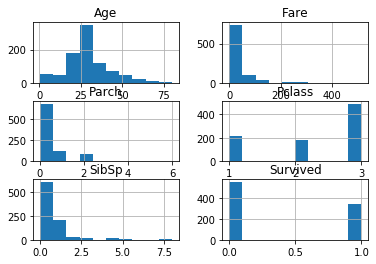

In [10]:
data.hist()

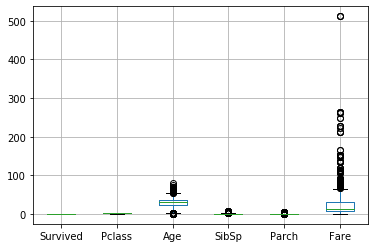

In [11]:
data.boxplot()

In [12]:
le = LabelEncoder()
data['Embarked'] =le.fit_transform(data['Embarked'])
data['Sex'] = le.fit_transform(data['Sex'])

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.0,2
1,1,1,0,38.0,1,0,71.0,0
2,1,3,0,26.0,0,0,8.0,2
3,1,1,0,35.0,1,0,53.0,2
4,0,3,1,35.0,0,0,8.0,2


#                                      K-Nearest Neighbour

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [30]:
def prediction(n):
    x = data.drop(['Pclass'],axis=1)
    y = data['Pclass']
    a = []
    b = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        a.append(i)
        
        print(" --------------------'The New Values'-----------------------")
        print(f" Here the K value is {i}: ")
              
        x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
              
        score = model.score(x_test,y_test)
        b.append(score)
              
        print(f"The Accuracy score when K is {i} ", score)
        print(f"Confusion Matrix when K is{i} \n", confusion_matrix(y_test, pred))
        
              
    plt.plot(a,b)
    plt.xlabel("k value")
    plt.ylabel("Accuracy")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()
        
    
    

Enter The number of iteration you want for k: 290
 --------------------'The New Values'-----------------------
 Here the K value is 1: 
The Accuracy score when K is 1  0.832089552238806
Confusion Matrix when K is1 
 [[ 56   4   0]
 [  9  32  11]
 [  3  18 135]]
 --------------------'The New Values'-----------------------
 Here the K value is 2: 
The Accuracy score when K is 2  0.7947761194029851
Confusion Matrix when K is2 
 [[ 59   1   0]
 [ 15  33   4]
 [  7  28 121]]
 --------------------'The New Values'-----------------------
 Here the K value is 3: 
The Accuracy score when K is 3  0.8283582089552238
Confusion Matrix when K is3 
 [[ 55   3   2]
 [ 10  29  13]
 [  4  14 138]]
 --------------------'The New Values'-----------------------
 Here the K value is 4: 
The Accuracy score when K is 4  0.8171641791044776
Confusion Matrix when K is4 
 [[ 57   2   1]
 [ 12  29  11]
 [  5  18 133]]
 --------------------'The New Values'-----------------------
 Here the K value is 5: 
The Accuracy 

The Accuracy score when K is 46  0.7611940298507462
Confusion Matrix when K is46 
 [[ 54   3   3]
 [ 11  14  27]
 [  5  15 136]]
 --------------------'The New Values'-----------------------
 Here the K value is 47: 
The Accuracy score when K is 47  0.7723880597014925
Confusion Matrix when K is47 
 [[ 55   2   3]
 [ 11  13  28]
 [  6  11 139]]
 --------------------'The New Values'-----------------------
 Here the K value is 48: 
The Accuracy score when K is 48  0.7611940298507462
Confusion Matrix when K is48 
 [[ 54   3   3]
 [ 10  14  28]
 [  6  14 136]]
 --------------------'The New Values'-----------------------
 Here the K value is 49: 
The Accuracy score when K is 49  0.753731343283582
Confusion Matrix when K is49 
 [[ 54   2   4]
 [ 10  10  32]
 [  7  11 138]]
 --------------------'The New Values'-----------------------
 Here the K value is 50: 
The Accuracy score when K is 50  0.746268656716418
Confusion Matrix when K is50 
 [[ 54   2   4]
 [  9  10  33]
 [  6  14 136]]
 --------

The Accuracy score when K is 86  0.753731343283582
Confusion Matrix when K is86 
 [[ 46   8   6]
 [  3  11  38]
 [  7   4 145]]
 --------------------'The New Values'-----------------------
 Here the K value is 87: 
The Accuracy score when K is 87  0.7611940298507462
Confusion Matrix when K is87 
 [[ 45   9   6]
 [  3  10  39]
 [  7   0 149]]
 --------------------'The New Values'-----------------------
 Here the K value is 88: 
The Accuracy score when K is 88  0.75
Confusion Matrix when K is88 
 [[ 45   9   6]
 [  3   9  40]
 [  7   2 147]]
 --------------------'The New Values'-----------------------
 Here the K value is 89: 
The Accuracy score when K is 89  0.753731343283582
Confusion Matrix when K is89 
 [[ 45   9   6]
 [  3   8  41]
 [  7   0 149]]
 --------------------'The New Values'-----------------------
 Here the K value is 90: 
The Accuracy score when K is 90  0.7574626865671642
Confusion Matrix when K is90 
 [[ 45   8   7]
 [  3   9  40]
 [  7   0 149]]
 --------------------'T

The Accuracy score when K is 125  0.7313432835820896
Confusion Matrix when K is125 
 [[ 41   6  13]
 [  3  10  39]
 [  4   7 145]]
 --------------------'The New Values'-----------------------
 Here the K value is 126: 
The Accuracy score when K is 126  0.7350746268656716
Confusion Matrix when K is126 
 [[ 41   6  13]
 [  3  11  38]
 [  4   7 145]]
 --------------------'The New Values'-----------------------
 Here the K value is 127: 
The Accuracy score when K is 127  0.7350746268656716
Confusion Matrix when K is127 
 [[ 41   6  13]
 [  3  11  38]
 [  4   7 145]]
 --------------------'The New Values'-----------------------
 Here the K value is 128: 
The Accuracy score when K is 128  0.7388059701492538
Confusion Matrix when K is128 
 [[ 42   5  13]
 [  3  11  38]
 [  4   7 145]]
 --------------------'The New Values'-----------------------
 Here the K value is 129: 
The Accuracy score when K is 129  0.7388059701492538
Confusion Matrix when K is129 
 [[ 42   8  10]
 [  3  11  38]
 [  4   7

The Accuracy score when K is 167  0.7425373134328358
Confusion Matrix when K is167 
 [[ 40   8  12]
 [  2  11  39]
 [  3   5 148]]
 --------------------'The New Values'-----------------------
 Here the K value is 168: 
The Accuracy score when K is 168  0.746268656716418
Confusion Matrix when K is168 
 [[ 40   8  12]
 [  2  11  39]
 [  3   4 149]]
 --------------------'The New Values'-----------------------
 Here the K value is 169: 
The Accuracy score when K is 169  0.7388059701492538
Confusion Matrix when K is169 
 [[ 39   8  13]
 [  2  10  40]
 [  3   4 149]]
 --------------------'The New Values'-----------------------
 Here the K value is 170: 
The Accuracy score when K is 170  0.7388059701492538
Confusion Matrix when K is170 
 [[ 39   8  13]
 [  2  10  40]
 [  3   4 149]]
 --------------------'The New Values'-----------------------
 Here the K value is 171: 
The Accuracy score when K is 171  0.7425373134328358
Confusion Matrix when K is171 
 [[ 39   8  13]
 [  2  10  40]
 [  3   3 

The Accuracy score when K is 208  0.7276119402985075
Confusion Matrix when K is208 
 [[ 38   7  15]
 [  2   4  46]
 [  3   0 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 209: 
The Accuracy score when K is 209  0.7276119402985075
Confusion Matrix when K is209 
 [[ 38   7  15]
 [  2   4  46]
 [  3   0 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 210: 
The Accuracy score when K is 210  0.7276119402985075
Confusion Matrix when K is210 
 [[ 38   7  15]
 [  2   4  46]
 [  3   0 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 211: 
The Accuracy score when K is 211  0.7276119402985075
Confusion Matrix when K is211 
 [[ 38   7  15]
 [  2   4  46]
 [  3   0 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 212: 
The Accuracy score when K is 212  0.7276119402985075
Confusion Matrix when K is212 
 [[ 38   7  15]
 [  2   4  46]
 [  3   0

The Accuracy score when K is 248  0.7201492537313433
Confusion Matrix when K is248 
 [[ 38   1  21]
 [  2   2  48]
 [  2   1 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 249: 
The Accuracy score when K is 249  0.7201492537313433
Confusion Matrix when K is249 
 [[ 38   1  21]
 [  2   2  48]
 [  2   1 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 250: 
The Accuracy score when K is 250  0.7201492537313433
Confusion Matrix when K is250 
 [[ 38   1  21]
 [  2   2  48]
 [  2   1 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 251: 
The Accuracy score when K is 251  0.7201492537313433
Confusion Matrix when K is251 
 [[ 38   1  21]
 [  2   2  48]
 [  2   1 153]]
 --------------------'The New Values'-----------------------
 Here the K value is 252: 
The Accuracy score when K is 252  0.7201492537313433
Confusion Matrix when K is252 
 [[ 38   1  21]
 [  2   2  48]
 [  2   1

The Accuracy score when K is 288  0.7164179104477612
Confusion Matrix when K is288 
 [[ 38   1  21]
 [  2   0  50]
 [  2   0 154]]
 --------------------'The New Values'-----------------------
 Here the K value is 289: 
The Accuracy score when K is 289  0.7164179104477612
Confusion Matrix when K is289 
 [[ 38   1  21]
 [  2   0  50]
 [  2   0 154]]


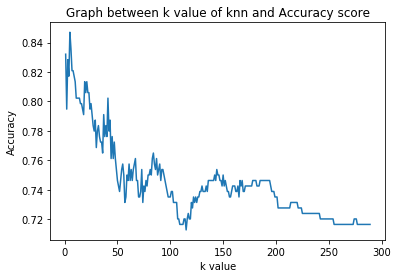

In [31]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)

Conclusion:
When the k value is 1 , It gives highest accuracy : 0.832089552238806 (but it overfits the data)
When the k value is 5 , It gives same accuracy as that for k=1 : 0.8470149253731343
After k=5 , the accuracy decreases
So, K = 5 is the best k for this model